Step 1: Importing Libraries and Dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("c:\\Users\\hoan\\Downloads\\HousePricePrediction.csv")

print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


- Id: To count the records.
- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotArea: Lot size in square feet.
- LotConfig: Configuration of the lot.
- BldgType: Type of dwelling.
- OverallCond: Rates the overall condition of the house.
- YearBuilt: Original construction year.
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).
- Exterior1st: Exterior covering on house.
- BsmtFinSF2: Type 2 finished square feet.
- TotalBsmtSF: Total square feet of basement area.
- SalePrice: To be predicted.

In [20]:
dataset.shape


(2919, 13)

- The dataset contains 2,919 rows and 13 columns.

- This means there are 2,919 records (observations) and 13 features (variables) in the dataset.

Step 2: Data Preprocessing

In [21]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


- The dataset includes 4 categorical variables and 3 float variables.

- There are no integer variables present.

Step 3: Exploratory Data Analysis

<Axes: >

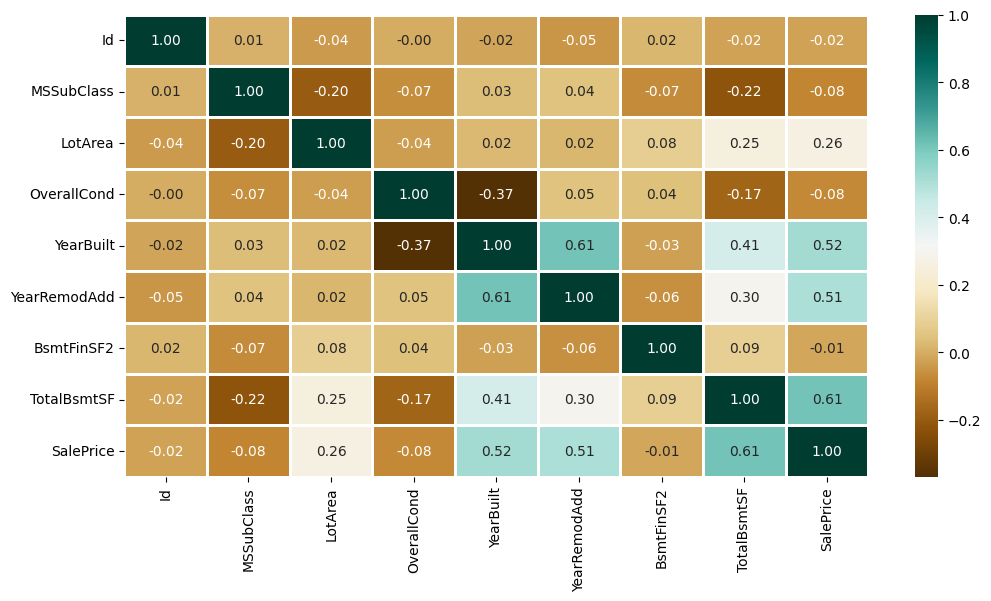

In [22]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

📊 Correlation Analysis Summary
🔹 Strong Positive Correlations with SalePrice
- TotalBsmtSF (0.61): This is the most strongly correlated variable with SalePrice. Larger basement size is associated with higher prices.

- YearBuilt (0.52): Newer houses tend to sell for more.

- YearRemodAdd (0.51): Homes that were recently remodeled also tend to have higher prices.

🔸 Moderate Positive Correlation
- LotArea (0.26): Larger lot size slightly increases the sale price, but the effect is moderate.

⚠️ Weak or No Correlation
- BsmtFinSF2 (-0.01): Almost no correlation with SalePrice, suggesting that type 2 finished basement area doesn’t significantly impact the sale price.

- MSSubClass (-0.08): Weak negative correlation. The class/type of dwelling slightly affects price but not strongly.

- OverallCond (-0.08): Surprisingly low correlation — might indicate that condition as measured here doesn’t align well with market value.

- Id (-0.02): As expected, the ID has no correlation with sale price.

🔍 Other Noteworthy Relationships
- YearBuilt and YearRemodAdd: Strongly correlated (0.61) — newer homes tend to also have recent renovations.

- TotalBsmtSF and YearBuilt (0.41) — newer homes may have larger basements.

✅ Insights for Modeling
- Consider including: TotalBsmtSF, YearBuilt, YearRemodAdd, and LotArea as predictors.

- Consider excluding: Id, BsmtFinSF2, and possibly OverallCond, unless further feature engineering is applied.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

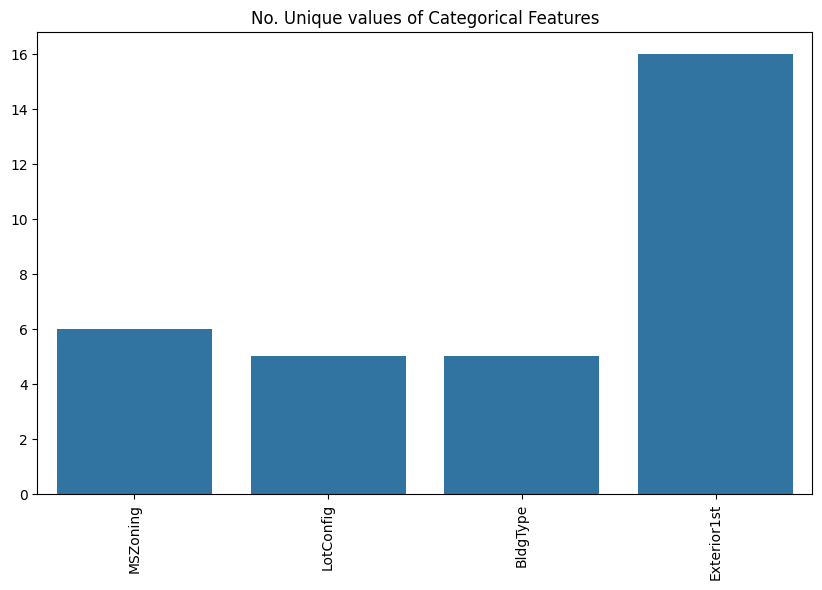

In [23]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

🧩 Analysis of Categorical Feature Cardinality
- The chart illustrates how many unique categories exist for each categorical variable in the dataset:

Feature	Unique Values
MSZoning	6
LotConfig	5
BldgType	5
Exterior1st	16

🔹 Key Observations:
- Exterior1st has the highest cardinality (16 unique values), suggesting it might introduce complexity for encoding (e.g., one-hot encoding may result in many columns).

- MSZoning, LotConfig, and BldgType have relatively low cardinality (5–6 categories), making them easier to encode and suitable for use in many models.

- These variables may capture important aspects of location, layout, and dwelling type, which could impact house pricing.

✅ Modeling Implications:
- Low-cardinality features like MSZoning, LotConfig, and BldgType are ideal for simple encoding.

- High-cardinality feature like Exterior1st may require:

- Grouping less frequent categories,

- Or using advanced encoding (e.g., target encoding or embedding techniques) to reduce dimensionality.

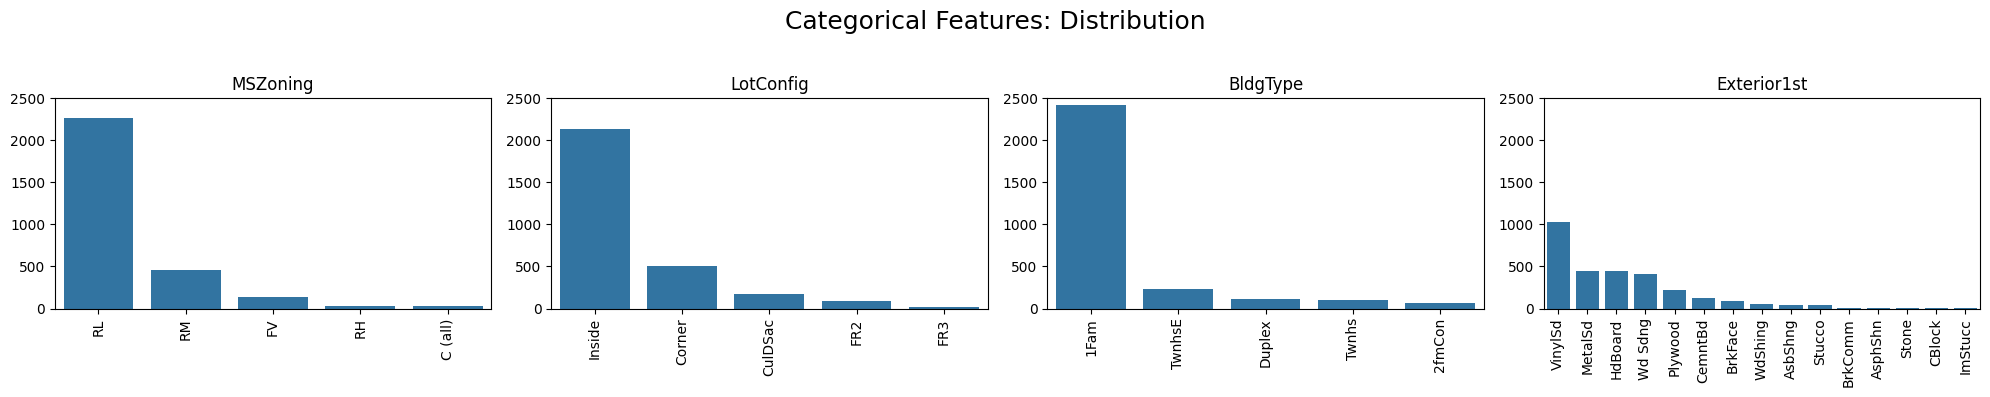

In [24]:
n_cols = 4
n_rows = (len(object_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
fig.suptitle('Categorical Features: Distribution', fontsize=18)
axes = axes.flatten()

for index, col in enumerate(object_cols):
    y = dataset[col].value_counts()
    sns.barplot(x=y.index, y=y.values, ax=axes[index])
    axes[index].set_title(col)
    axes[index].tick_params(axis='x', rotation=90)
    axes[index].set_xlabel('')
    axes[index].set_ylabel('')
    axes[index].set_ylim(0, 2500)  
    axes[index].set_xticks(range(len(y.index)))
    axes[index].set_xticklabels(y.index)

# Hide any unused subplots
for i in range(index + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Step 4: Data Cleaning

In [25]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

This line of code removes the Id column from the dataset DataFrame. Here's what each part does:

- dataset.drop(...): Calls the drop() method on the DataFrame named dataset.

- ['Id']: Specifies the column named Id to be dropped (provided as a list).

- axis=1: Indicates that we're dropping a column (use axis=0 to drop rows).

- inplace=True: Makes the change directly to dataset without needing to assign it to a new variable.

Summary:
- This code deletes the Id column permanently from the DataFrame dataset.

In [26]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 

This line fills any missing values in the SalePrice column with the column's mean value:

- .fillna(...): Replaces NaN (missing) values.

- dataset['SalePrice'].mean(): Calculates the average (mean) of the non-missing values in the column.

- The result is assigned back to dataset['SalePrice'], updating the column.

Summary:
- This code replaces all missing values in the SalePrice column with the column’s average value to ensure no nulls remain.

In [27]:
new_dataset = dataset.dropna()

- dataset.dropna(): Returns a new DataFrame with all rows containing any missing (NaN) values removed.

- new_dataset = ...: Stores the result in a new DataFrame called new_dataset.

Summary:
- This code removes all rows from dataset that have at least one missing value and saves the cleaned data into new_dataset.

In [28]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

- new_dataset.isnull(): Returns a DataFrame of the same shape as new_dataset, with True where values are missing (NaN) and False otherwise.

- .sum(): Adds up the number of True values (i.e. missing values) for each column.

Summary:
- This code shows how many missing values remain in each column of new_dataset. It helps verify that missing data has been handled.

Step 5: OneHotEncoder - For Label categorical features

In [29]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


This code identifies and lists all categorical columns in new_dataset, which are useful for encoding before feeding into machine learning models. In this case, there are 4 categorical features.

In [30]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

This code replaces the original categorical columns in new_dataset with their one-hot encoded versions and produces a fully numerical DataFrame df_final, ready for machine learning models.

Step 6: Splitting Dataset into Training and Testing

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

Step 7: Model Training and Accuracy

1. SVM - Support vector Machine

In [32]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


Output: 0.1871
→ On average, the model's predictions are 18.71% off from the actual house prices.

2. Random Forest Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.19347855283863158

Output: 0.1935
→ On average, the model’s predictions are 19.35% off from the actual sale prices.

3. Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.187416838415999


Output: 0.1874
→ On average, the model's predictions are 18.74% off from the actual sale prices.